# Sales Analysis
### Kok Yen Zein

## Goal:

Using the 12 months of sales data, transform and adjust the data in order to make meaningful interpretations. Use the meaningful data to create visualizations and analyze to discover new findings. 

### Import Libraries

In [256]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
from itertools import combinations
from collections import Counter


### Step 1: Merging 12 months of sales data into a single .csv file

In [20]:
df = pd.read_csv("./Sales_Data/Sales_January_2019.csv")

In [21]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215"
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035"
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016"
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001"
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301"


In [38]:
files = [file for file in os.listdir("./Sales_Data")]
df = pd.DataFrame()

for file in files:
    temp_df = pd.read_csv("./Sales_Data/"+file)
    df = pd.concat([df, temp_df])

df.to_csv("Compiled_Data.csv", index=False)

In [39]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
11681,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
11682,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
11683,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
11684,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


#### Read in the updated data

In [83]:
df = pd.read_csv("./Compiled_Data.csv")

In [84]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"



### Step 2: Remove all NaN values

Notice that from the compiled data set, there are NaN values, meaning missing values, so I want to delete any tuple/rows contains NaN.

In [85]:
print("data missing values (%):\n")
print(round(df.isnull().sum().sort_values(ascending=False)/len(df.index),4)*100) 

data missing values (%):

Order ID            0.29
Product             0.29
Quantity Ordered    0.29
Price Each          0.29
Order Date          0.29
Purchase Address    0.29
dtype: float64


In [86]:
df = df.dropna()

In [87]:
# Checking if all null values are deleted
print("data missing values (%):\n")
print(round(df.isnull().sum().sort_values(ascending=False)/len(df.index),4)*100) 

data missing values (%):

Order ID            0.0
Product             0.0
Quantity Ordered    0.0
Price Each          0.0
Order Date          0.0
Purchase Address    0.0
dtype: float64


In [88]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"



### Step 3: Augment data with additional columns

Now, I want to splice the data such that a new column can be generated to contain a more obvious and clear idea.

#### 3.1 Add a Month column

In [112]:
df["Month"] = df["Order Date"].str[0:2]

In [114]:
df[df["Month"].str[0:2] == "Or"]

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
519,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1149,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
1155,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2878,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
2893,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
...,...,...,...,...,...,...,...
185164,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
185551,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186563,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or
186632,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Or


##### The Month column contains multiple instances of "Or", so I will remove any tuples/rows containing the Month "Or"

In [124]:
df = df[df["Order Date"].str[0:2] != "Or"]
df["Month"] = df["Order Date"].str[0:2]

In [127]:
df["Month"] = df["Month"].astype(int)

In [128]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4



#### 3.2 Add a Sales column

In [130]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  int32 
dtypes: int32(1), object(6)
memory usage: 10.6+ MB


##### Notice that the "Qantity Ordered" and "Price Each" relation is not an integer data type and float data type respectively, so we have to convert that in order to find the sales

In [132]:
df["Quantity Ordered"] = df["Quantity Ordered"].astype(int)
df["Price Each"] = df["Price Each"].astype(float)

In [166]:
df["Sales"] = df["Quantity Ordered"] * df["Price Each"]

In [167]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


 #### 3.3 Add a City column

In [188]:
df["City"] = df["Purchase Address"].apply(
    lambda address:address.split(',')[1])
df["City"] = df["City"].astype(str)

In [189]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles


#### 3.4 Converting Order Date into a datetime data type

In [216]:
df["Order Date"] = pd.to_datetime(df["Order Date"])

In [218]:
df["Hour"] = df["Order Date"].dt.hour
df["Minute"] = df["Order Date"].dt.minute

In [219]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas,8,46
2,176559,Bose SoundSport Headphones,1,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston,22,30
3,176560,Google Phone,1,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles,14,38
4,176560,Wired Headphones,1,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles,14,38
5,176561,Wired Headphones,1,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles,9,27



### Step 4: Analysis

#### 4.1 What was the best month for sales? How much was eaned that month?

In [169]:
df.groupby("Month").sum().sort_values(by="Sales", ascending=False)
# December 2019 was the best month for sales with $4,613,443.34

,Quantity Ordered,Price Each,Sales
Month,,,
12,28114,4588415.41,4613443.34
10,22703,3715554.83,3736726.88
4,20558,3367671.02,3390670.24
11,19798,3180600.68,3199603.20
5,18667,3135125.13,3152606.75
3,17005,2791207.83,2807100.38
7,16072,2632539.56,2647775.76
6,15253,2562025.61,2577802.26
8,13448,2230345.42,2244467.88


#### 4.2 What city had the highest number of sales?

In [183]:
df.groupby("City").sum().sort_values(by="Sales", ascending=False)
# San Francisco is the city with the highest number of sales
# at $8,262,203.91

,Quantity Ordered,Price Each,Month,Sales
City,,,,
San Francisco,50239,8211461.74,315520,8262203.91
Los Angeles,33289,5421435.23,208325,5452570.80
New York City,27932,4635370.83,175741,4664317.43
Boston,22528,3637409.77,141112,3661642.01
Atlanta,16602,2779908.20,104794,2795498.58
Dallas,16730,2752627.82,104620,2767975.40
Seattle,16553,2733296.01,104941,2747755.48
Portland,14053,2307747.47,87765,2320490.61
Austin,11153,1809873.61,69829,1819581.75


#### 4.3 What products are mopst often sold together?

In [249]:
# Create a new data frame with duplicate "Order ID"
dups = df[df["Order ID"].duplicated(keep=False)]

In [251]:
# Add a column which contains all the data items in one "Order ID"
dups["Grouped"] = dups.groupby("Order ID")["Product"].transform(
    lambda x:','.join(x))

C:\Users\kokye\AppData\Local\Temp\ipykernel_15420\3755740066.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dups["Grouped"] = dups.groupby("Order ID")["Product"].transform(


In [254]:
# Dropping any duplicates, so there are only unique "Order ID"s
dups = dups[["Order ID", "Grouped"]].drop_duplicates()

In [259]:
# Counting the number of product combinations
count = Counter()
for row in dups["Grouped"]:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))
for key, value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143
('Lightning Charging Cable', 'Wired Headphones') 92


#### 4.4 What product sold the most? Why do you think it sold the most?

In [260]:
df.groupby("Product").sum().sort_values(
    by="Quantity Ordered", ascending=False)
# AAA Batteries (4-pack) sold the most, it is an essential item,
# or because it is cheap.

,Quantity Ordered,Price Each,Month,Sales,Hour,Minute
Product,,,,,,
AAA Batteries (4-pack),31017,61716.59,146370,92740.83,297332,612113
AA Batteries (4-pack),27635,79015.68,145558,106118.40,298342,609039
USB-C Charging Cable,23975,261740.85,154819,286501.25,314645,647586
Lightning Charging Cable,23217,323787.10,153092,347094.15,312529,634442
Wired Headphones,20557,226395.18,133397,246478.43,271720,554023
Apple Airpods Headphones,15661,2332350.00,109477,2349150.00,223304,455570
Bose SoundSport Headphones,13457,1332366.75,94113,1345565.43,192445,392603
27in FHD Monitor,7550,1125974.93,52558,1132424.50,107540,219948
iPhone,6849,4789400.00,47941,4794300.00,98657,201688



### Step 5: Visualization

#### 5.1: Visualize sales per month

(-1.0, 12.0)

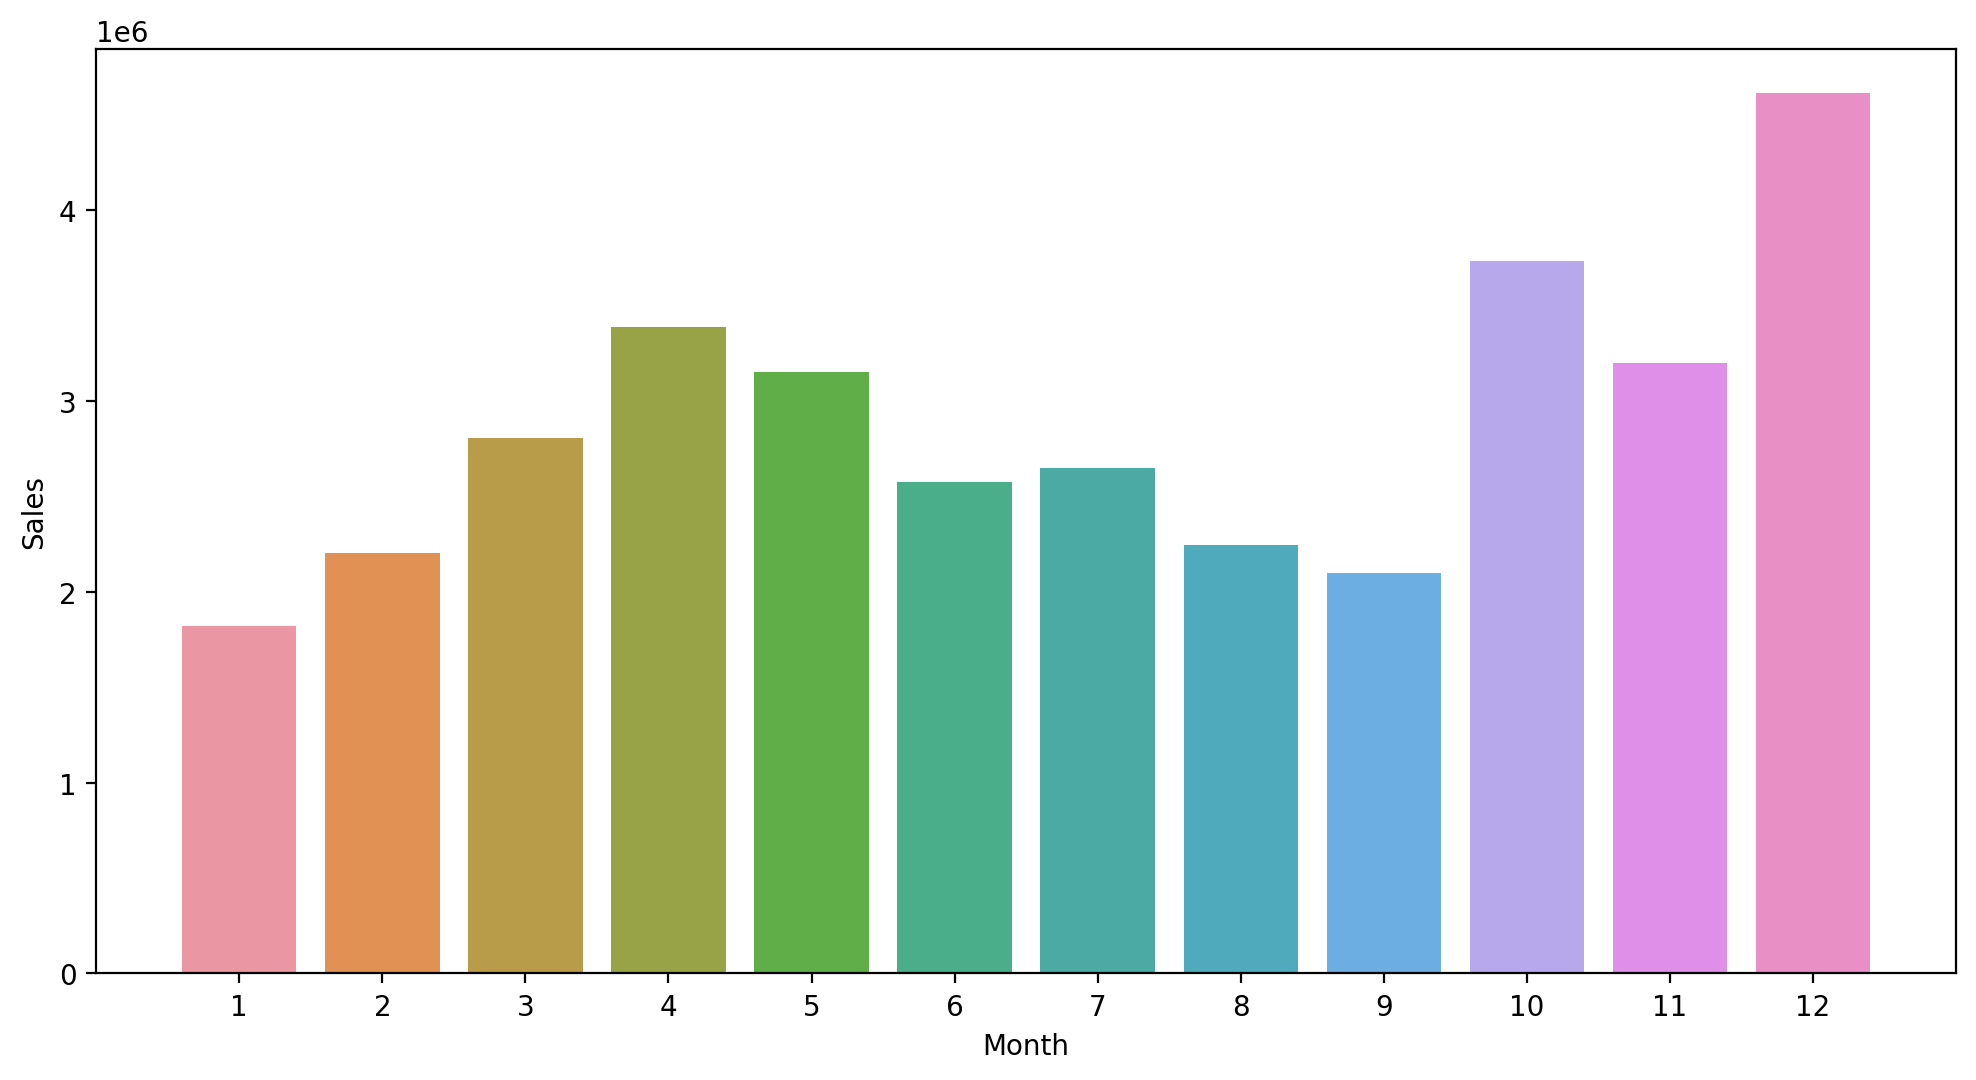

In [215]:
result = df.groupby("Month", as_index=False).sum()

plt.figure(figsize=(12, 6), dpi=200)
sns.barplot(data=result, x="Month", y="Sales")
plt.xlim(-1, 12)

#### 5.2: Visualize sales per city

<AxesSubplot:xlabel='City', ylabel='Sales'>

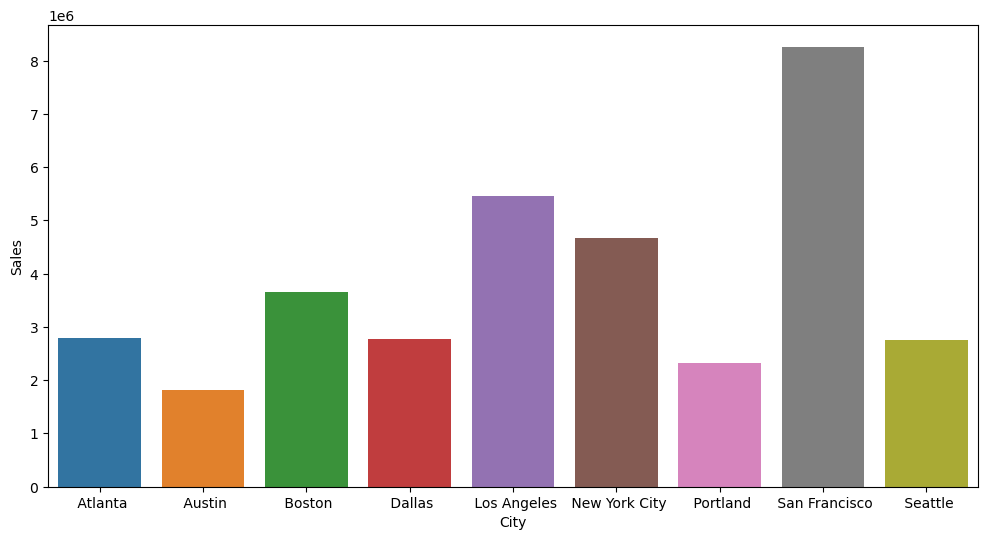

In [213]:
result = df.groupby("City", as_index=False).sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=result, x="City", y="Sales")

#### 5.3 What time should we display advertisements to maximize likelihood of customer's buying product?

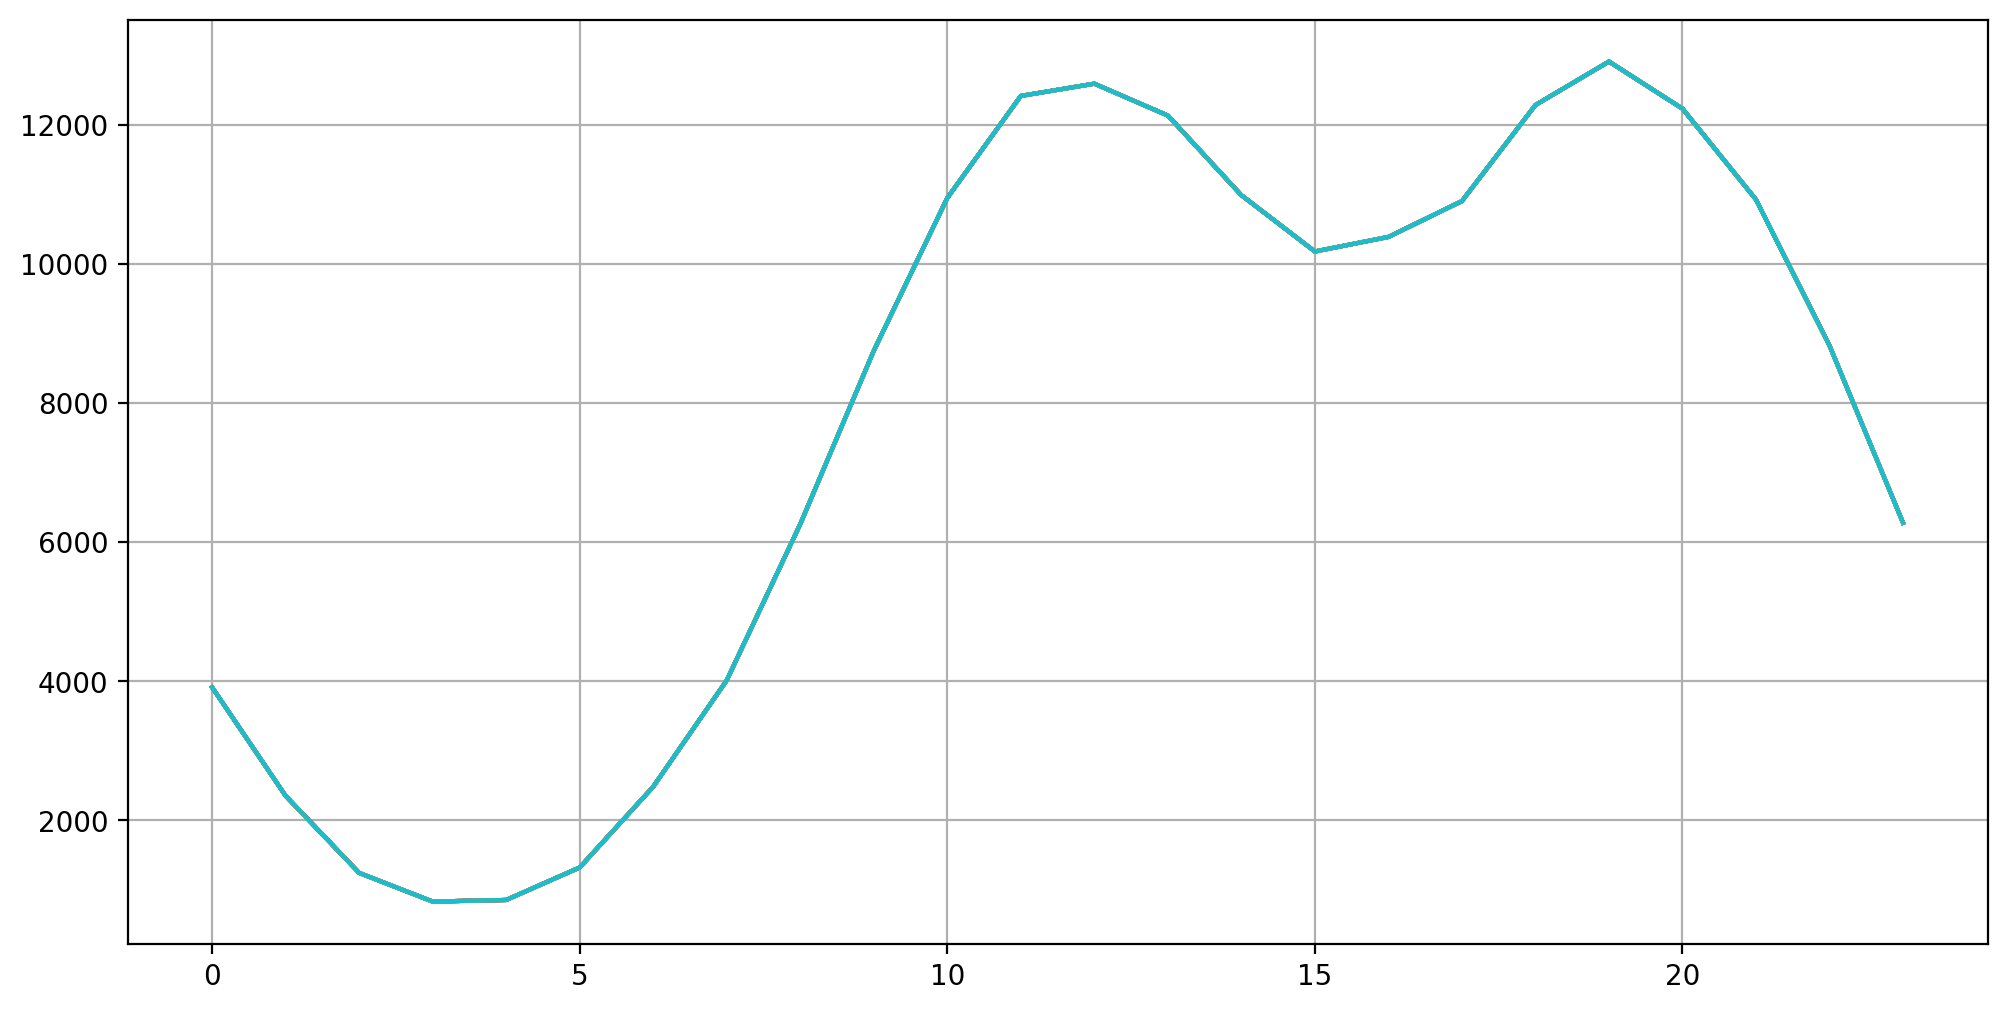

In [234]:
hours = [hour for hour, df in df.groupby("Hour")]

plt.figure(figsize=(12, 6), dpi=200)
plt.plot(hours, df.groupby(['Hour']).count())
plt.grid()

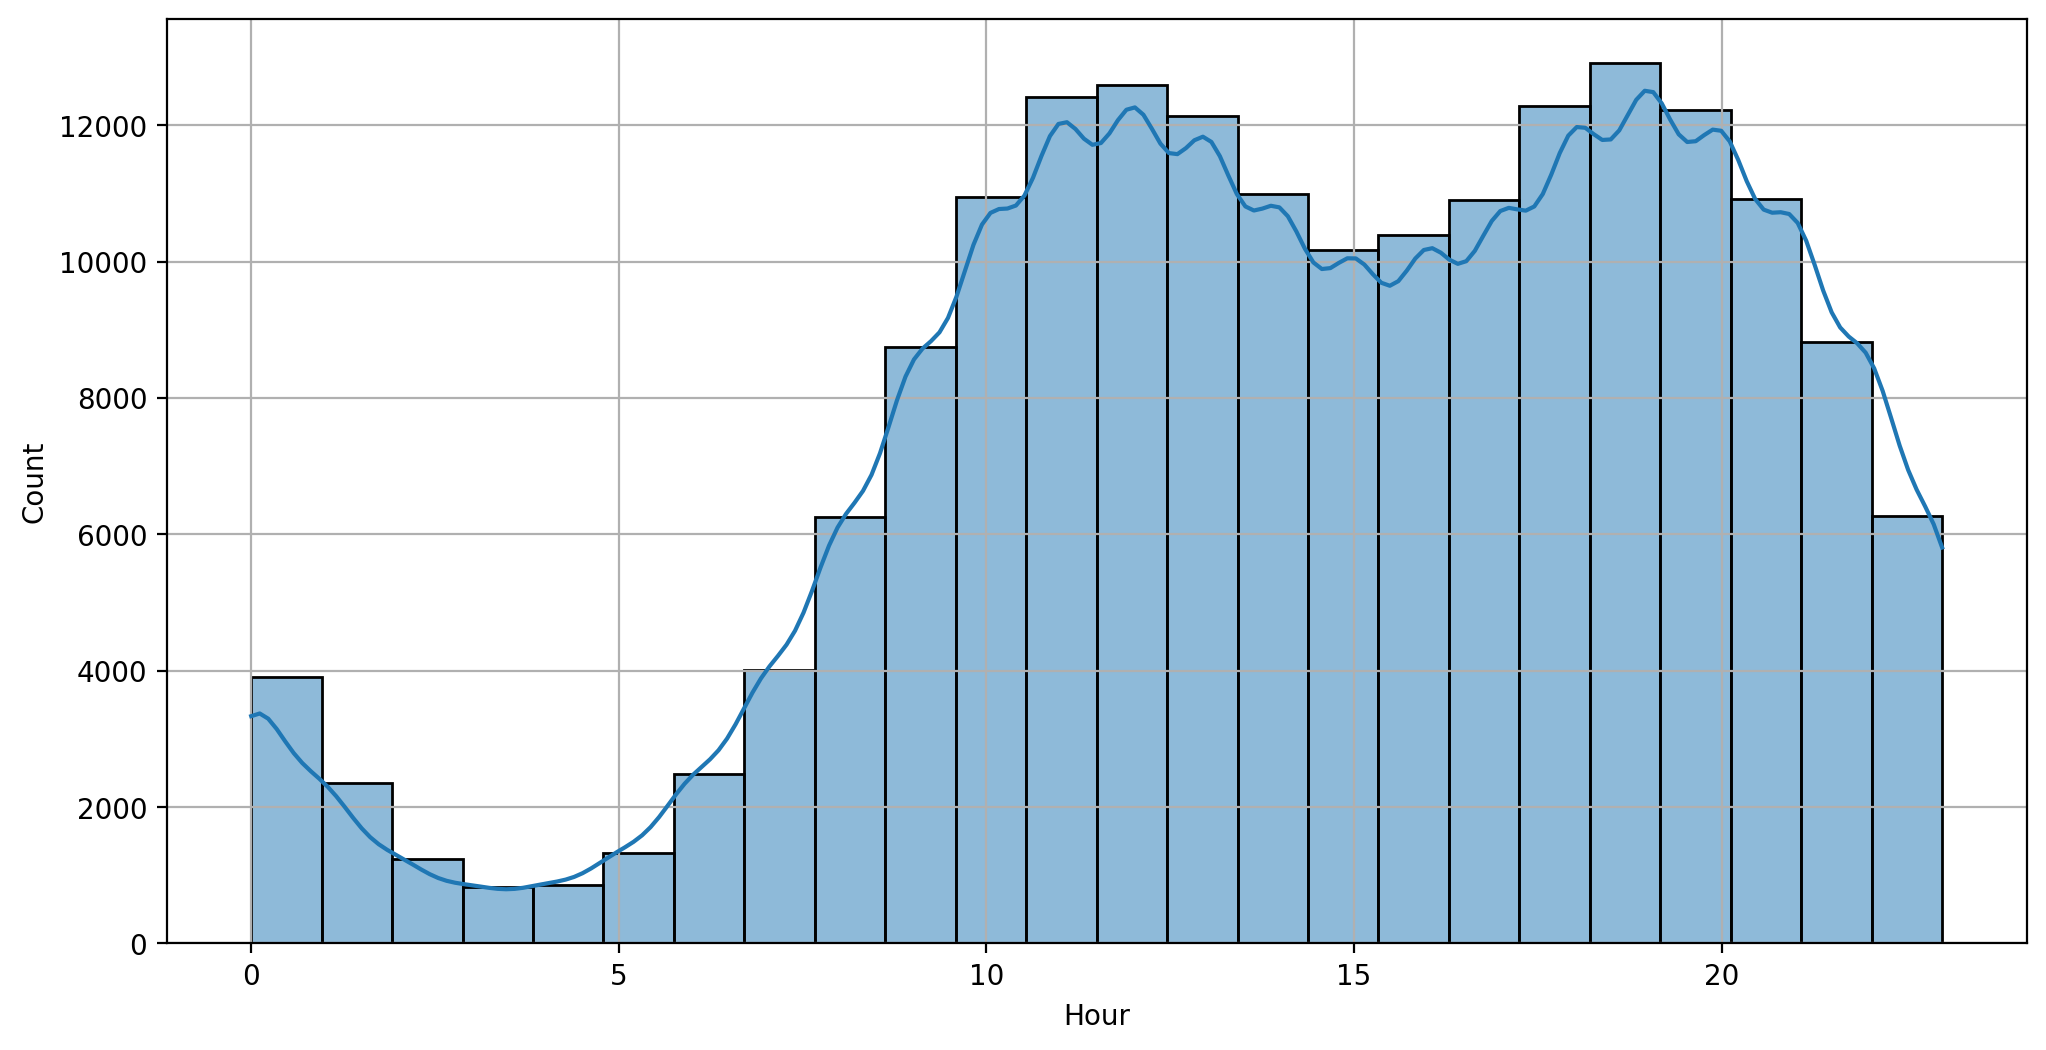

In [244]:
plt.figure(figsize=(12, 6), dpi=200)
sns.histplot(data=df, x="Hour", kde=True, bins = 24)
plt.grid()

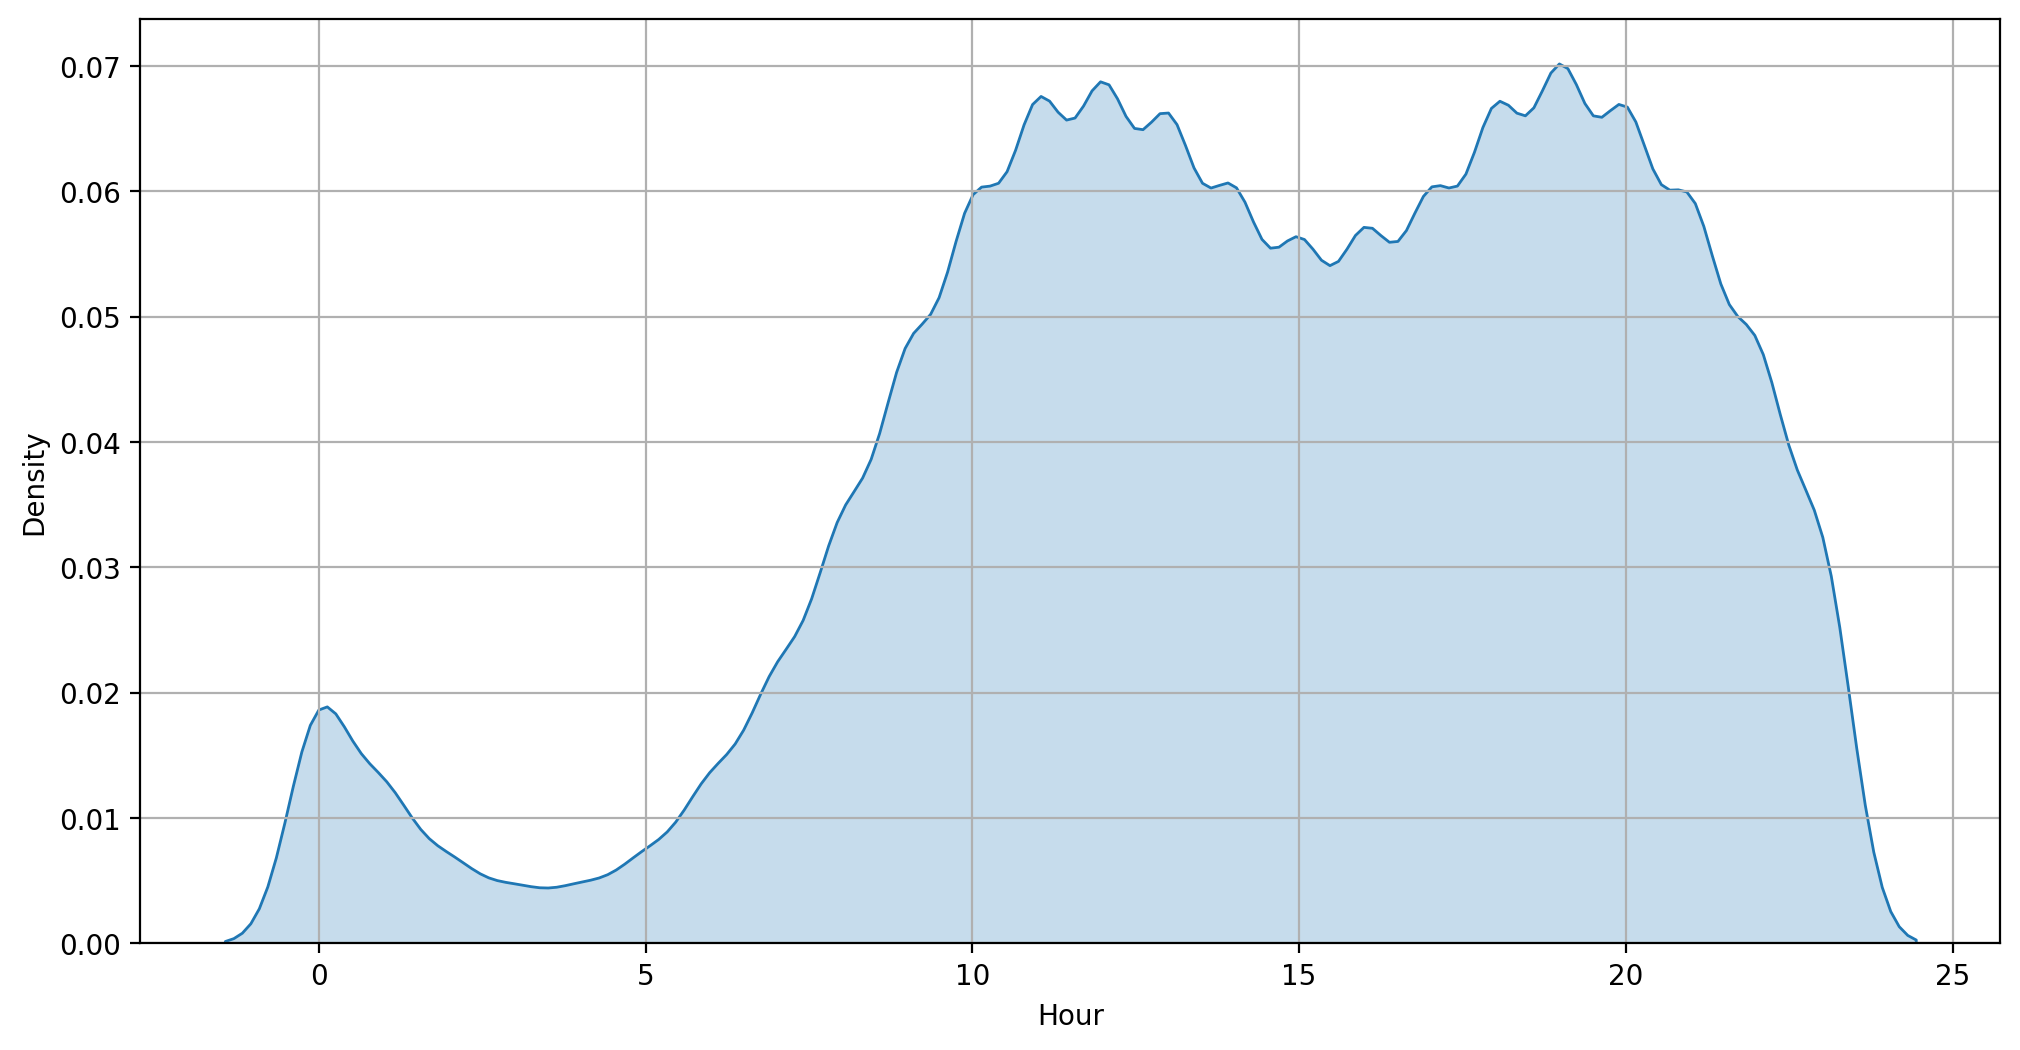

In [236]:
plt.figure(figsize=(12, 6), dpi=200)
sns.kdeplot(data=df, x="Hour", fill=True)
plt.grid()

In [245]:
# My Recommendation would be between 11am - 1pm or 6pm - 8pm

#### 5.4 Visualize count per product sold

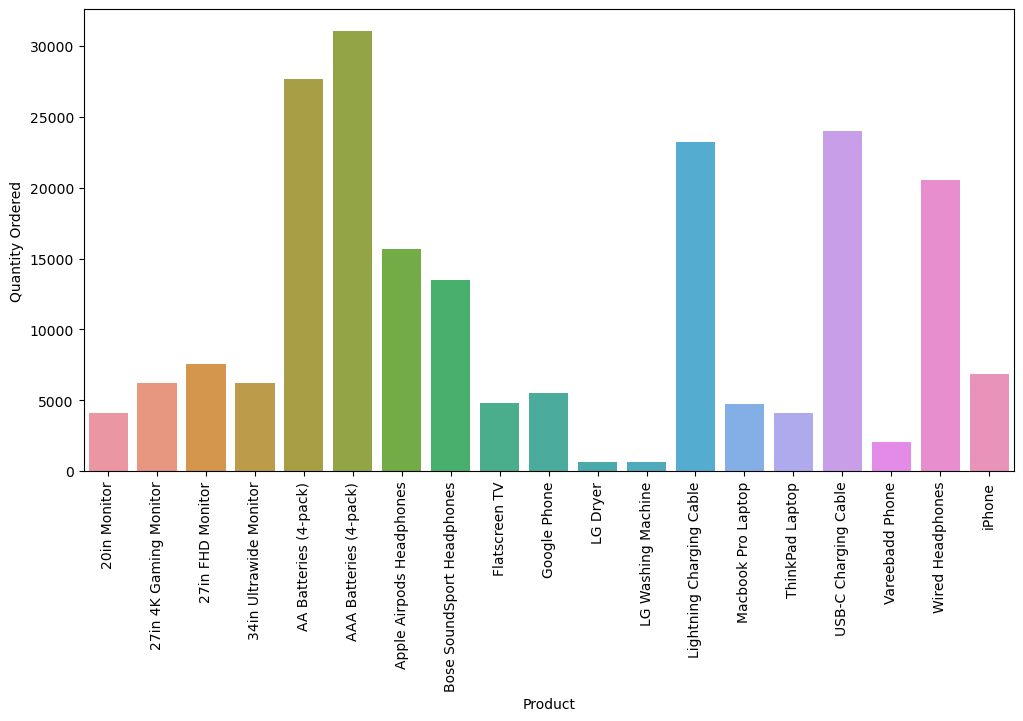

In [264]:
result = df.groupby("Product", as_index=False).sum()

plt.figure(figsize=(12, 6))
sns.barplot(data=result, x="Product", y="Quantity Ordered")
plt.xticks(rotation='vertical')
plt.show()

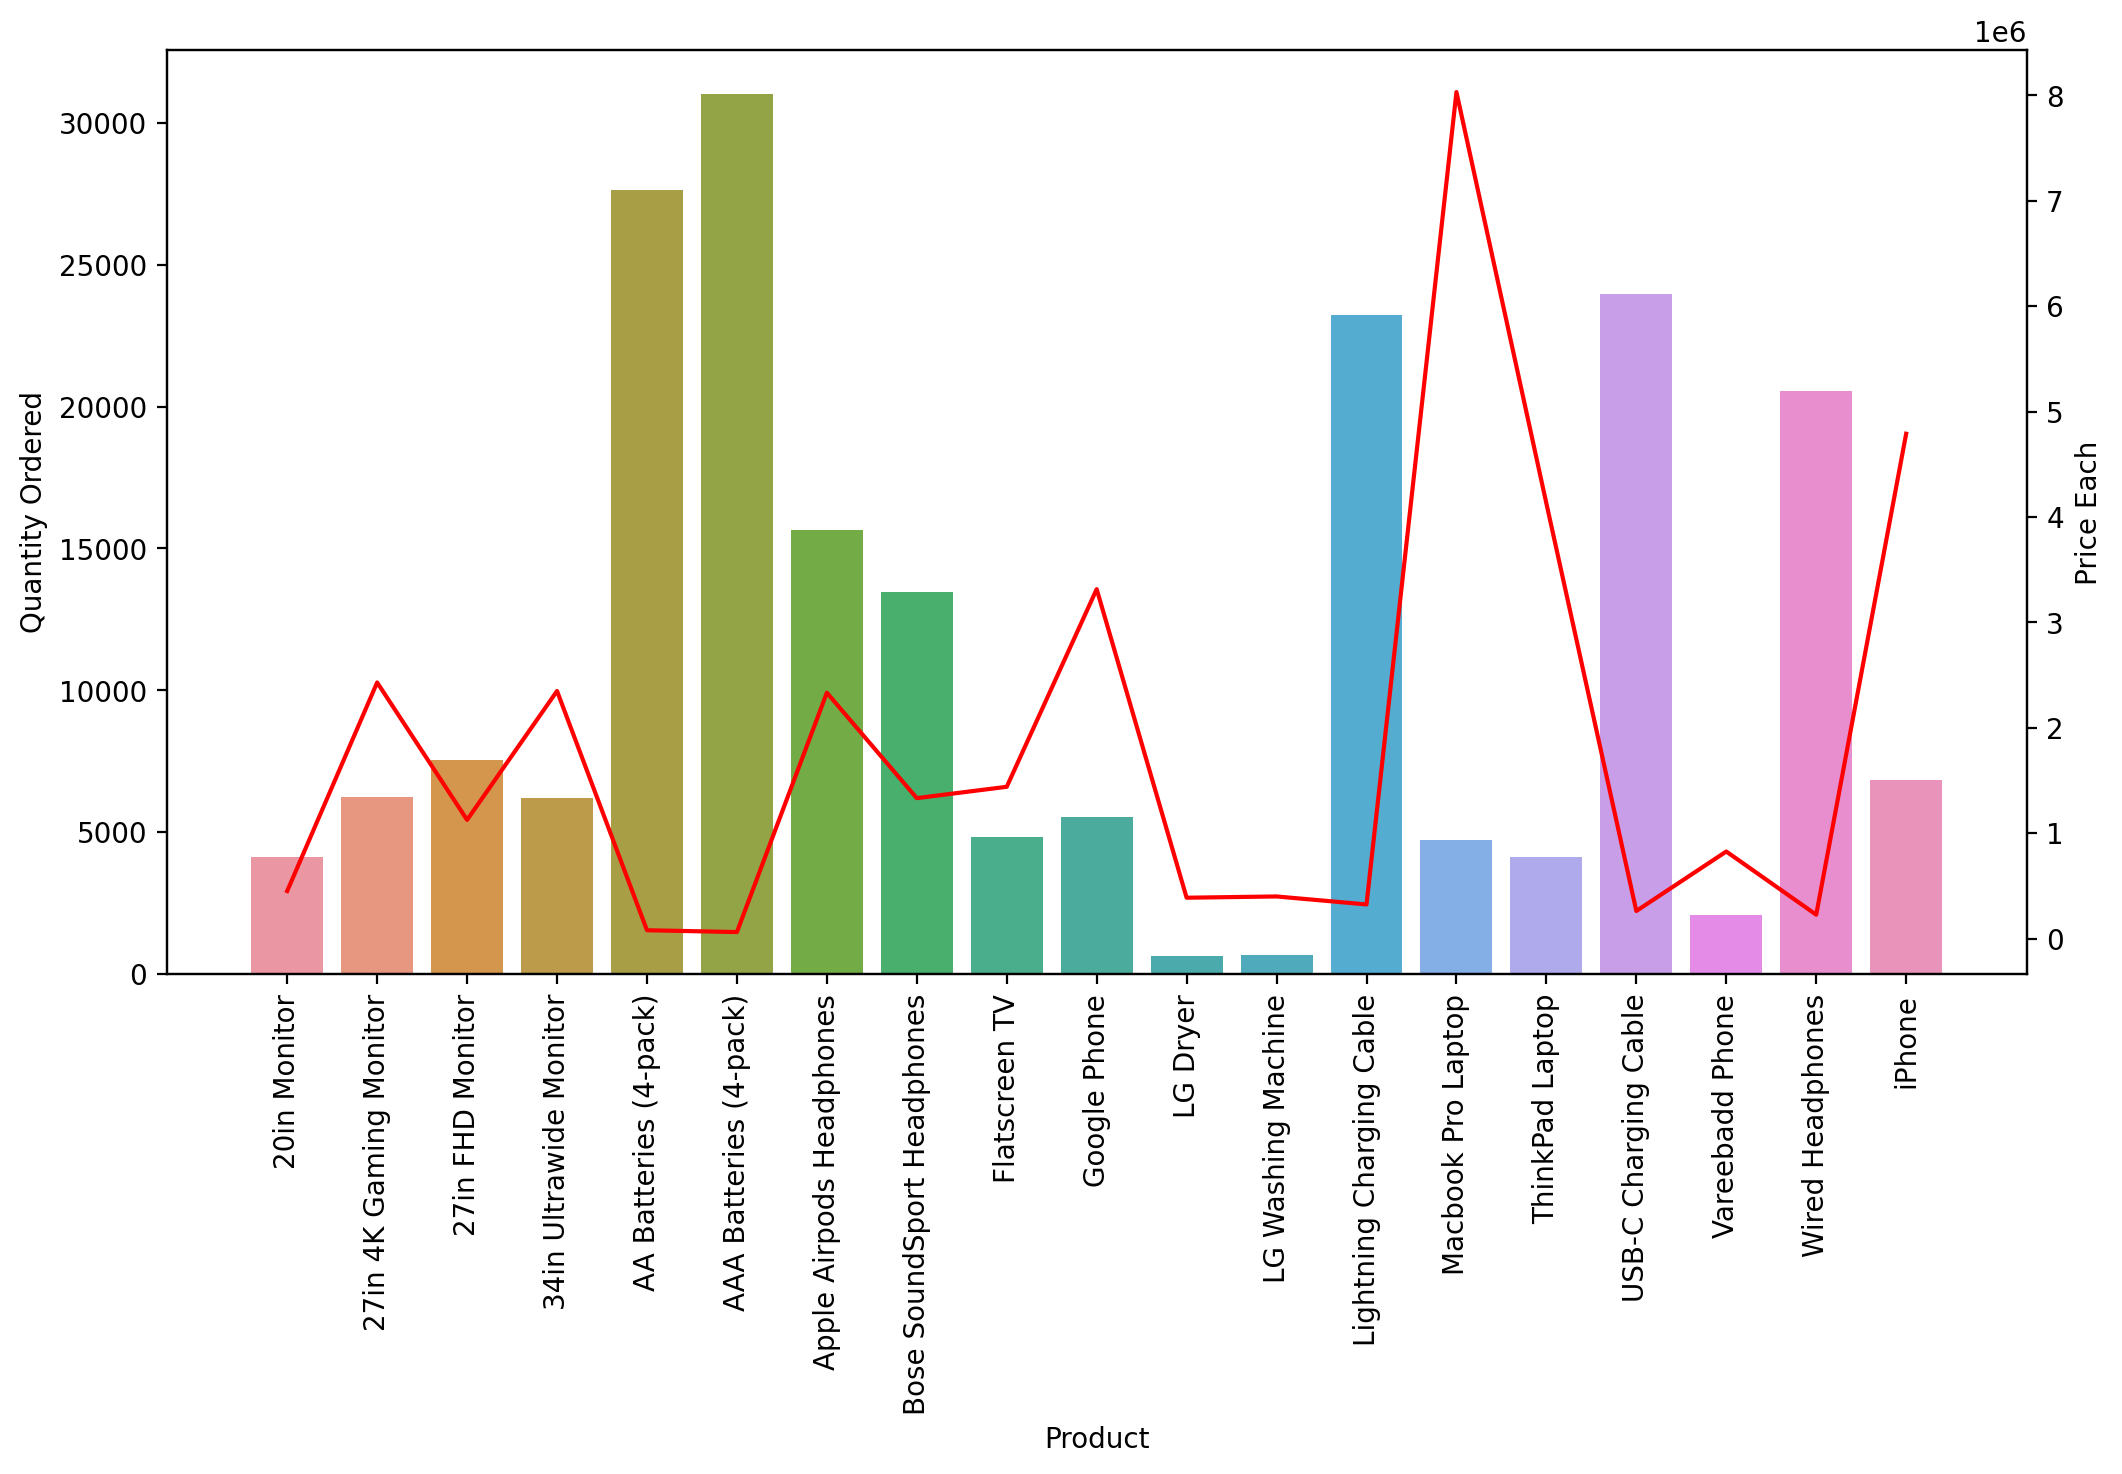

In [304]:
# Visualize the price against the quantity sold to prove our hypothesis
# that cheap items have high quantity oredered.
result = df.groupby("Product", as_index=False).sum()
price = df.groupby("Product", as_index=False).sum()[["Product","Price Each"]]

fig, ax1 = plt.subplots(figsize=(12, 6), dpi=200)
sns.barplot(data=result, x="Product", y="Quantity Ordered", ax=ax1)
plt.xticks(rotation='vertical')
ax2 = ax1.twinx()
sns.lineplot(data=price, x="Product", y="Price Each", ax=ax2, color="red")
plt.xticks(rotation='vertical')
plt.show()
# We can see that the when the "Quantity Ordered" is high, the 
# "Price Each" is low. The converse is true.

<AxesSubplot:xlabel='Price Each', ylabel='Quantity Ordered'>

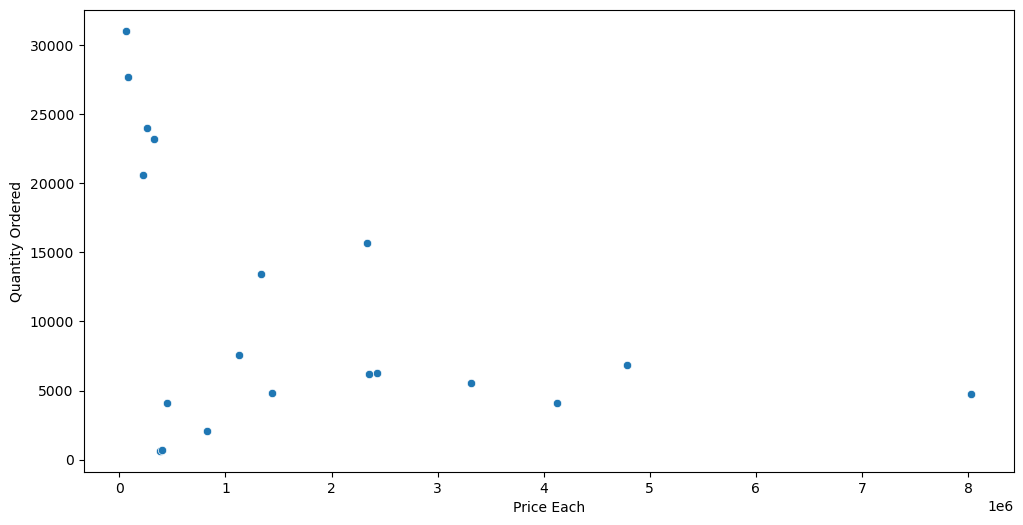

In [273]:
result = df.groupby("Product", as_index=False).sum()

plt.figure(figsize=(12, 6))
sns.scatterplot(data=result, x="Price Each", y="Quantity Ordered")
# As the price increases, the Quantity Ordered decreases.